# Working with data 2017. Class 2 
## Contact
Javier Garcia-Bernardo
garcia@uva.nl


## 0. Structure
1. Data types, structures and code II
2. Tidy data: Pivoting and melting dataframes
3. Merging and concatenating dataframes
4. Working with missing data
5. My second plots

In [261]:
#Normal inputs
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as plt
%matplotlib inline

from IPython.display import Image, display

#Make the notebook wider
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:90% !important; }</style>"))

In [328]:
#Create a toy dataframe
df = pd.DataFrame([[1,2,3],[1,2,3]],columns=["a","b","c"])
df

,a,b,c
0,1,2,3
1,1,2,3


## Save CSV to disk (df.to_csv())
- path_or_buf = filename
- sep = separator
- na_rep (default "") = how do you want to represent missing values
- header = do you want to save the column names?
- index (default True) = is there an index to save? usually False

In [263]:
#Saving the toy dataframe above
df.to_csv("data/toy_df.csv",sep="\t",index=False)

## 2. Tidy data
### 2.1 Observations and variables
- A variable is any characteristics, number, or quantity that can be measured or counted: e.g. income, height, happiness
    - Numeric: Numbers
        - Continuous: Area, height, etc
        - Discrete: The rolls of a die, many answers in surveys, etc
        
    - Categorical: Categories
        - Ordinal: Can be ordered. E.g. "high", "middle" and "low" income countries
        - Nominal: Cannot be ordered. E.g. "blue", "red" and "yellow" 
        
- An observation is each of the values of a variable: e.g. 800, 1.93, 8, "middle"

In [264]:
Image(url="http://www.abs.gov.au/websitedbs/a3121120.nsf/4a256353001af3ed4b2562bb00121564/5869990518bbb7feca257b55002261e0/Body/3.109A!OpenElement&FieldElemFormat=gif")

### 2.2 What is tidy data?
Based on: http://vita.had.co.nz/papers/tidy-data.pdf

Tidy data is a standard way of mapping the meaning of a dataset to its structure.  [...] In
tidy data:
1.  Each variable forms a column.
2.  Each observation forms a row.
3.  Each type of observational unit forms a table.

#### Advantages: Facilitate manipulation, visualisation and modelling
- Combining tables (merging two tables by the year)
- Plotting (df["x"] vs df["y"])
- Statistical models ("y" ~ "x" + C("year"))
- Examples adapted from http://stat405.had.co.nz/lectures/18-tidy-data.pdf

In [265]:
%%html
<h3>There are three variables in this data set. What are they? </h3> 
<table>
    <tr> <th></th> <th>2010</th> <th>2015</th> </tr>
    <tr> <td>Male</td> <td>0</td> <td>5</td> </tr>
    <tr> <td>Female</td> <td>1</td> <td>4</td> </tr>
</table>




,2010,2015
Male,0,5
Female,1,4


In [268]:
%%html
<h3>Tidy data</h3> 
<table>
    <tr> <th>year</th> <th>sex</th> <th>count</th> </tr>
    <tr> <td>2010</td> <td>female</td> <td>1</td> </tr>
    <tr> <td>2010</td> <td>male</td> <td>0</td> </tr>
    <tr> <td>2015</td> <td>female</td> <td>4</td> </tr>
    <tr> <td>2015</td> <td>male</td> <td>5</td> </tr>
</table>

year,sex,count
2010,female,1
2010,male,0
2015,female,4
2015,male,5


### 2.3 Tidying messy datasets
Real datasets can, and often do, violate the three precepts of tidy data in almost every way
imaginable. While occasionally you do get a dataset that you can start analysing immediately,
this is the exception,  not the rule:
- Column headers are values, not variable names --> Melt
- Multiple variables are stored in one column --> Pivot
- Variables are stored in both rows and columns --> Melt then pivot

Melting


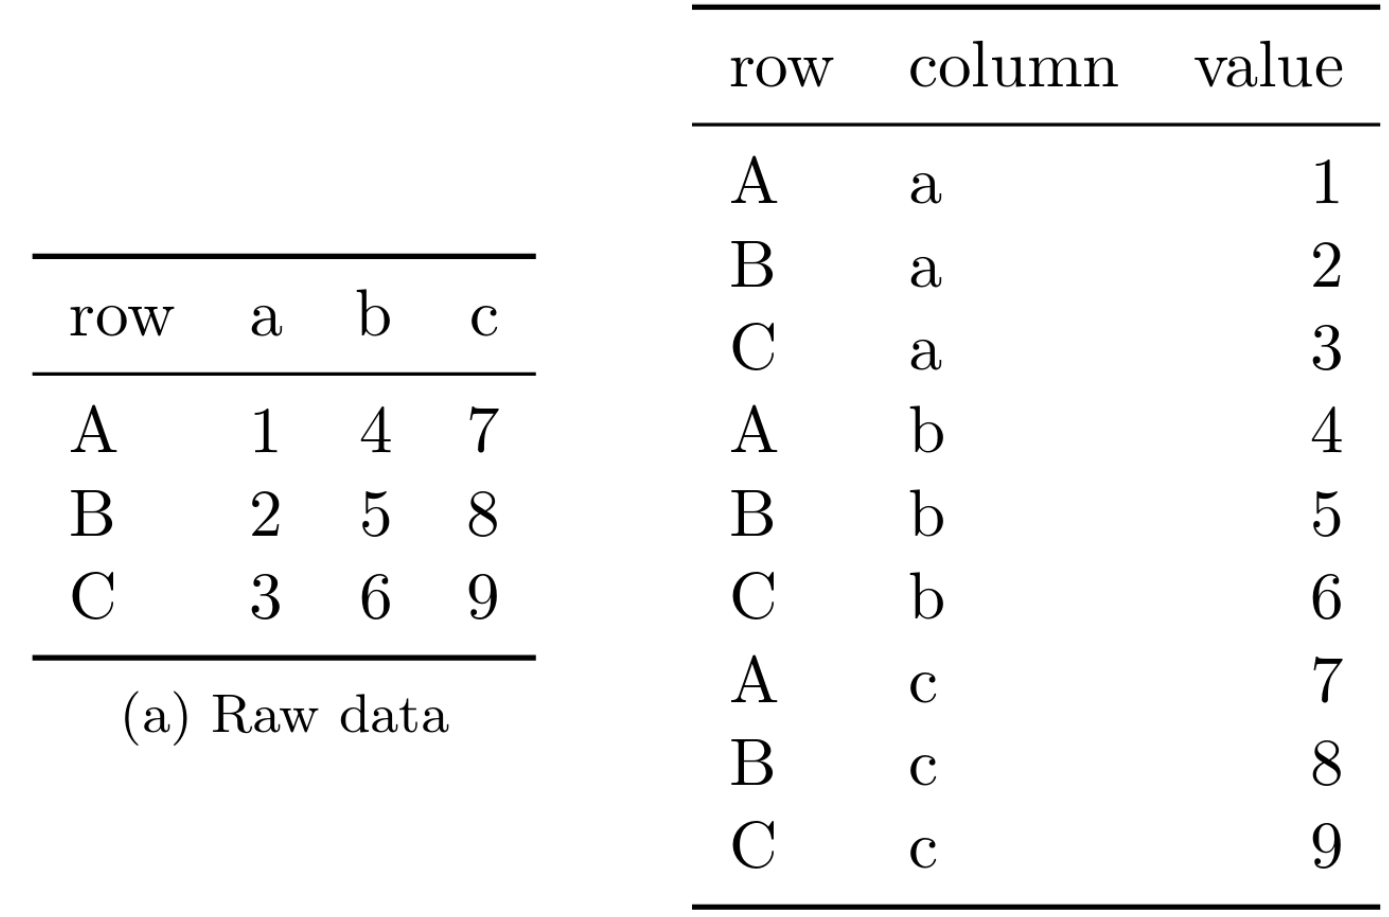

In [269]:
#Example of melting (columns to rows)
print("Melting")
Image("figures/melt.png",width=400)

Pivoting


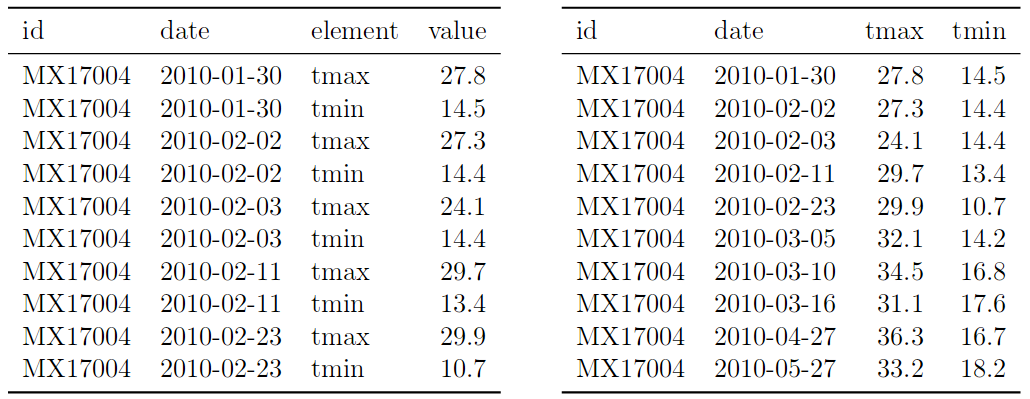

In [270]:
#Example of pivoting (rows to columns)
print("Pivoting")
Image("figures/pivot.png",width=800)

---

**Data to study: variations of https://stats.oecd.org/Index.aspx?DataSetCode=CITIES (which has problem 2)**

### 2.4 Column headers are values, not variable names: MELT

In [271]:
#Data on population density by year
df = pd.read_csv("data/columns_headers.csv")
df.head()

,Unnamed: 0,METRO_ID,Metropolitan areas,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,0,AT001,Vienna,267.27,269.90,272.56,275.26,277.99,280.75,283.54,286.38,289.24,292.15,295.09,298.07,301.08,304.14,307.23
1,1,AT002,Graz,179.92,181.59,183.28,185.01,186.76,188.55,190.36,192.20,194.07,195.97,197.91,199.87,201.87,203.90,205.96
2,2,AT003,Linz,165.29,165.94,166.60,167.27,167.94,168.62,169.31,170.00,170.70,171.41,172.12,172.84,173.57,174.31,175.05
3,3,AUS,Australia,2.47,2.50,2.53,2.56,2.59,2.62,2.65,2.70,2.76,2.82,2.86,2.90,2.95,3.00,3.05
4,4,AUS01,Sydney,332.15,335.48,338.18,340.38,342.20,344.88,348.04,353.71,360.58,367.35,372.51,376.88,382.38,388.94,395.83


In [277]:
list(df.columns)[3:]

['2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014']

In [273]:
### Fix

#Variables present in columns already
variables_already_presents = ['METRO_ID', 'Metropolitan areas']

#Variables to combine in one
columns_combine = ['2000', '2001', '2002','2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011','2012', '2013', '2014']

#Fix
fixed = pd.melt(df,id_vars=variables_already_presents,
           value_vars=columns_combine,
           var_name="Year",
           value_name="POP_DENS")
fixed.head(10)

,METRO_ID,Metropolitan areas,Year,POP_DENS
0,AT001,Vienna,2000,267.27
1,AT002,Graz,2000,179.92
2,AT003,Linz,2000,165.29
3,AUS,Australia,2000,2.47
4,AUS01,Sydney,2000,332.15
5,AUS02,Melbourne,2000,342.35
6,AUS03,Brisbane,2000,107.48
7,AUS04,Perth,2000,226.80
8,AUS05,Adelaide,2000,351.60
9,AUS06,Gold Coast-Tweed Heads,2000,210.14


### 2.5 Multiple variables are stored in one column: PIVOT_TABLE

In [280]:
#Actual data from OECD
df = pd.read_csv("data/multiple_variables.csv")
df.head()

,Unnamed: 0,METRO_ID,Metropolitan areas,VAR,Variables,TIME,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,0,AT001,Vienna,POP_DENS,Population density (persons per km2),2000,2000,RATIO,Ratio,0,Units,NaN,NaN,267.27,NaN,NaN
1,1,AT001,Vienna,POP_DENS,Population density (persons per km2),2001,2001,RATIO,Ratio,0,Units,NaN,NaN,269.90,NaN,NaN
2,2,AT001,Vienna,POP_DENS,Population density (persons per km2),2002,2002,RATIO,Ratio,0,Units,NaN,NaN,272.56,NaN,NaN
3,3,AT001,Vienna,POP_DENS,Population density (persons per km2),2003,2003,RATIO,Ratio,0,Units,NaN,NaN,275.26,NaN,NaN
4,4,AT001,Vienna,POP_DENS,Population density (persons per km2),2004,2004,RATIO,Ratio,0,Units,NaN,NaN,277.99,NaN,NaN


In [281]:
### Fix

#Columns already present
variables_already_present = ["METRO_ID","Metropolitan areas","Year"]

#Column with the variables
column_to_split = ["VAR"]

#Column with the values
column_with_values = "Value"

#Fix
df_fixed = df.pivot_table(column_with_values,
               variables_already_present,
               column_to_split)

df_fixed.head()

VAR                               GREEN_AREA_PC  POP_DENS
METRO_ID Metropolitan areas Year                         
AT001    Vienna             2000         255.17    267.27
                            2001         252.68    269.90
                            2002         250.22    272.56
                            2003         247.77    275.26
                            2004         245.34    277.99

In [282]:
#use .reset_index() to convert index to columns
df_fixed.reset_index().head()

VAR,METRO_ID,Metropolitan areas,Year,GREEN_AREA_PC,POP_DENS
0,AT001,Vienna,2000,255.17,267.27
1,AT001,Vienna,2001,252.68,269.90
2,AT001,Vienna,2002,250.22,272.56
3,AT001,Vienna,2003,247.77,275.26
4,AT001,Vienna,2004,245.34,277.99


### 2.6 Variables are stored in both rows and columns: MELT then PIVOT

Index(['METRO_ID', 'Metropolitan areas', 'VAR', 'Year', 'Value'], dtype='object')

In [297]:
df = pd.read_csv("data/multiple_variables_and_headers.csv")
df.head()

,Unnamed: 0,METRO_ID,Metropolitan areas,VAR,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,0,AT001,Vienna,GREEN_AREA_PC,255.17,252.68,250.22,247.77,245.34,242.92,240.53,238.15,235.79,233.44,231.12,228.81,226.52,224.24,221.99
1,1,AT001,Vienna,POP_DENS,267.27,269.90,272.56,275.26,277.99,280.75,283.54,286.38,289.24,292.15,295.09,298.07,301.08,304.14,307.23
2,2,AT002,Graz,GREEN_AREA_PC,997.39,988.23,979.10,969.96,960.85,951.75,942.72,933.67,924.67,915.69,906.73,897.83,888.95,880.11,871.29
3,3,AT002,Graz,POP_DENS,179.92,181.59,183.28,185.01,186.76,188.55,190.36,192.20,194.07,195.97,197.91,199.87,201.87,203.90,205.96
4,4,AT003,Linz,GREEN_AREA_PC,1791.92,1784.87,1777.80,1770.71,1763.59,1756.49,1749.38,1742.23,1735.10,1727.91,1720.77,1713.59,1706.40,1699.20,1691.99


In [298]:
print(list(df.columns)[4:])

['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']


In [299]:
cols = []
for column in df.columns:
    try: 
        int(column)
        cols.append(column)
    except:
        pass
print(cols)

['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']


In [300]:
### Fix setp 1
variables_already_presents = ['METRO_ID', 'Metropolitan areas','VAR']
columns_combine = cols
df = pd.melt(df,
           id_vars=variables_already_presents,
           value_vars=columns_combine,
           var_name="Year",
           value_name="Value")
df.head()

,METRO_ID,Metropolitan areas,VAR,Year,Value
0,AT001,Vienna,GREEN_AREA_PC,2000,255.17
1,AT001,Vienna,POP_DENS,2000,267.27
2,AT002,Graz,GREEN_AREA_PC,2000,997.39
3,AT002,Graz,POP_DENS,2000,179.92
4,AT003,Linz,GREEN_AREA_PC,2000,1791.92


In [301]:
### Fix step 2
column_with_values = "Value"
column_to_split = ["VAR"]
variables_already_present = ["METRO_ID","Metropolitan areas","Year"]
df.pivot_table(column_with_values,
               variables_already_present,
               column_to_split).reset_index().head()

VAR,METRO_ID,Metropolitan areas,Year,GREEN_AREA_PC,POP_DENS
0,AT001,Vienna,2000,255.17,267.27
1,AT001,Vienna,2001,252.68,269.90
2,AT001,Vienna,2002,250.22,272.56
3,AT001,Vienna,2003,247.77,275.26
4,AT001,Vienna,2004,245.34,277.99


## 3. Merging and concatenating datasets
Concatenate:
- Some times you obtain more data (with the same variables or different)

Merging:
- Many times you have several datasets that you have to combine according to a shared variable

### 3.1 Concatenate files (add more observations)

In [302]:
#Add more observations
Image(url="http://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_basic.png")

In [304]:
madrid = pd.read_csv("data/mad_twovariables.csv").head(2)
amsterdam = pd.read_csv("data/ams_twovariables.csv").head(2)
display(madrid)
display(amsterdam)



,METRO_ID,Metropolitan areas,Year,GREEN_AREA_PC,POP_DENS
0,ES001,Madrid,2000,31.5,471.88
1,ES001,Madrid,2001,31.0,479.60


,METRO_ID,Metropolitan areas,Year,GREEN_AREA_PC,POP_DENS
0,NL002,Amsterdam,2000,235.63,764.71
1,NL002,Amsterdam,2001,233.57,771.45


In [305]:
combined = pd.concat([madrid,amsterdam])
combined

,METRO_ID,Metropolitan areas,Year,GREEN_AREA_PC,POP_DENS
0,ES001,Madrid,2000,31.50,471.88
1,ES001,Madrid,2001,31.00,479.60
0,NL002,Amsterdam,2000,235.63,764.71
1,NL002,Amsterdam,2001,233.57,771.45


**Note that it's not a problem if the variables are not all the same**

But in that case you'll have missing values

In [306]:
a = pd.DataFrame([[1,2],[3,4]],columns=["a","b"])
b = pd.DataFrame([[1,2],[3,4]],columns=["c","b"])
display(a)
display(b)


,a,b
0,1,2
1,3,4


,c,b
0,1,2
1,3,4


In [307]:
pd.concat([a,b])

,a,b,c
0,1.0,2,NaN
1,3.0,4,NaN
0,NaN,2,1.0
1,NaN,4,3.0


### 3.2 Merge datasets

In [308]:
Image(url="http://pandas.pydata.org/pandas-docs/stable/_images/merging_merge_on_key.png",width=700)

In [309]:
ams_green = pd.read_csv("data/ams_green.csv")
ams_pop = pd.read_csv("data/ams_popdens.csv")
display(ams_green.head(2))
display(ams_pop.head(2))

,METRO_ID,Metropolitan areas,Year,GREEN_AREA_PC
0,NL002,Amsterdam,2000,235.63
1,NL002,Amsterdam,2001,233.57


,METRO_ID,Metropolitan areas,Year,POP_DENS
0,NL002,Amsterdam,2000,764.71
1,NL002,Amsterdam,2001,771.45


In [310]:
combined = pd.merge(ams_green,ams_pop,
         left_on=["METRO_ID","Metropolitan areas","Year"],
         right_on=["METRO_ID","Metropolitan areas","Year"],
         how="inner")
combined.head()

,METRO_ID,Metropolitan areas,Year,GREEN_AREA_PC,POP_DENS
0,NL002,Amsterdam,2000,235.63,764.71
1,NL002,Amsterdam,2001,233.57,771.45
2,NL002,Amsterdam,2002,231.51,778.30
3,NL002,Amsterdam,2003,229.46,785.26
4,NL002,Amsterdam,2004,227.41,792.34


In [311]:
print("Inner join pd.merge(left_df,right_df,how=\"inner\")")
display(Image(url="http://pandas.pydata.org/pandas-docs/stable/_images/merging_merge_on_key_inner.png"))
print("Right join pd.merge(left_df,right_df,how=\"right\")", "The same with left")
display(Image(url="http://pandas.pydata.org/pandas-docs/stable/_images/merging_merge_on_key_right.png"))
print("Outer join pd.merge(left_df,right_df,how=\"outer\")")
display(Image(url="http://pandas.pydata.org/pandas-docs/stable/_images/merging_merge_on_key_outer.png"))

Inner join pd.merge(left_df,right_df,how="inner")


Right join pd.merge(left_df,right_df,how="right") The same with left


Outer join pd.merge(left_df,right_df,how="outer")


## 4. Change columns, replace and apply functions
- Some times we want to replace some categories with numbers

- This is especially important with text (and we'll talk more in the class about text)

In [312]:
def read_our_csv():
    #reading the raw data from oecd
    df = pd.read_csv("data/CITIES_19122016195113034.csv",sep="\t")

    #fixing the columns (the first one is ""METRO_ID"" instead of "METRO_ID")
    cols = list(df.columns)
    cols[0] = "METRO_ID"
    df.columns = cols
    
    #pivot the table
    column_with_values = "Value"
    column_to_split = ["VAR"]
    variables_already_present = ["METRO_ID","Metropolitan areas","Year"]
    df_fixed = df.pivot_table(column_with_values,
                 variables_already_present,
                 column_to_split).reset_index()
    
    return df_fixed
    

In [315]:
read_our_csv().head()

VAR,METRO_ID,Metropolitan areas,Year,CO2_PC,ENTROPY_1000M,EQU_HOU_DISP_INC,GDP_PC,GINI_INC,GREEN_AREA_PC,LABOUR_PRODUCTIVITY,PCT_INTENSITY,POP_DENS,SPRAWL,UNEMP_R
0,AT001,Vienna,2000,12.77,NaN,NaN,45434.48,NaN,255.17,94254.60,0.90,267.27,NaN,4.77
1,AT001,Vienna,2001,NaN,NaN,NaN,45479.15,NaN,252.68,94805.82,0.97,269.90,NaN,4.83
2,AT001,Vienna,2002,NaN,NaN,NaN,46065.50,NaN,250.22,100463.10,1.06,272.56,NaN,5.82
3,AT001,Vienna,2003,NaN,NaN,NaN,45470.92,NaN,247.77,97851.61,1.15,275.26,NaN,6.24
4,AT001,Vienna,2004,NaN,NaN,NaN,46148.38,NaN,245.34,102259.13,1.34,277.99,NaN,7.20


### 4.1 Multiply columns

In [316]:
#Read and fix the data
df_fixed = read_our_csv()
df_fixed = df_fixed.loc[df_fixed["Year"]==2000,["GREEN_AREA_PC","POP_DENS"]]    
df_fixed.head()

VAR,GREEN_AREA_PC,POP_DENS
0,255.17,267.27
15,997.39,179.92
30,1791.92,165.29
45,NaN,2.47
60,55.38,332.15


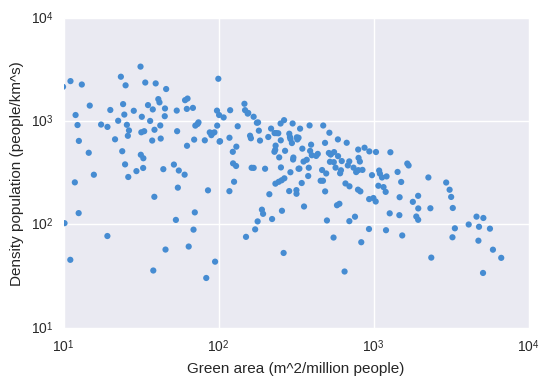

In [317]:
plt.figure(figsize=(6,4))
plt.scatter(df_fixed["GREEN_AREA_PC"],df_fixed["POP_DENS"],edgecolor="none",color=(70/255,140/255,210/255))
plt.yscale("log")
plt.xscale("log")
plt.ylim(10,10000)
plt.xlim(10,10000)
plt.xlabel("Green area (m^2/million people)")
plt.ylabel("Density population (people/km^s)")

### Is there a relationship between green area per capita and population density? Why?

---

**Imagine we want to calculate the fraction of green area**

$$\frac{10^{6} m^2_{green}}{people} \cdot \frac{people}{km^2_{city}} = \frac{10^{6} m^2_{green}}{km^2_{city}}$$

In [318]:
#fraction of green area
df_fixed["fraction_green"] = df_fixed["GREEN_AREA_PC"]*df_fixed["POP_DENS"]/1E6

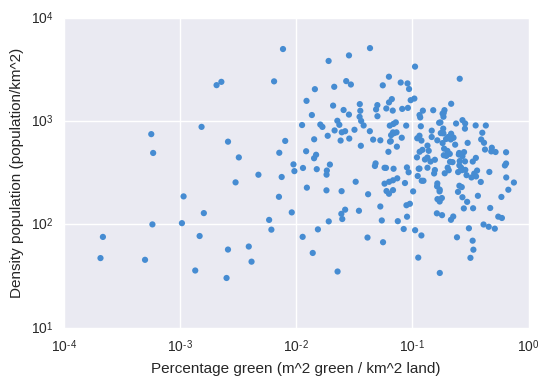

In [319]:
#make the figure
plt.figure(figsize=(6,4))
plt.scatter(df_fixed["fraction_green"],df_fixed["POP_DENS"],edgecolor="none",color=(70/255,140/255,210/255))
plt.yscale("log")
plt.xscale("log")
plt.ylim(10,10000)
plt.xlim(0.0001,1)
plt.xlabel("Percentage green (m^2 green / km^2 land)")
plt.ylabel("Density population (population/km^2)")

### 4.2 Categories to numbers

In [320]:
#Imagine we want to convert the income to a category
df = pd.DataFrame({"kids": [2,3,3,1,3,1,4,4,2], "income": [">100",">100","<40","<40","40-100","<40","40-100",">100","40-100"]})
df

,income,kids
0,>100,2
1,>100,3
2,<40,3
3,<40,1
4,40-100,3
5,<40,1
6,40-100,4
7,>100,4
8,40-100,2


In [321]:
#First we need a dictionary
d_cat2income = {">100": 100, "40-100": 70, "<40": 40}

In [322]:
def category2income(value):
    return d_cat2income.get(value)

df = pd.DataFrame({"kids": [2,3,3,1,3,1,4,4,2], "income": [">100",">100","40-100","<40","40-100","<40","40-100",">100","40-100"]})
df["income"] = df["income"].apply(category2income)
df.head()

,income,kids
0,100,2
1,100,3
2,70,3
3,40,1
4,70,3


In [323]:
#Or without creating a new function
df = pd.DataFrame({"kids": [2,3,3,1,3,1,4,4,2], "income": [">100",">100","40-100","<40","40-100","<40","40-100",">100","40-100"]})
df["income"] = df["income"].apply(lambda x: d_cat2income.get(x))
df.head()

,income,kids
0,100,2
1,100,3
2,70,3
3,40,1
4,70,3


### 4.2 Keeping part of a the values in a column (text)
We'll talk more about this when we talk about text analysis

In [324]:
df_fixed = read_our_csv().loc[:,["METRO_ID","Year"]]
df_fixed.head()

VAR,METRO_ID,Year
0,AT001,2000
1,AT001,2001
2,AT001,2002
3,AT001,2003
4,AT001,2004


In [325]:
def keep_2_letters(value):
    return value[:2]

df_fixed["Country"] = df_fixed["METRO_ID"].apply(keep_2_letters)
df_fixed.head()

VAR,METRO_ID,Year,Country
0,AT001,2000,AT
1,AT001,2001,AT
2,AT001,2002,AT
3,AT001,2003,AT
4,AT001,2004,AT


In [326]:
#or in one line
df_fixed["Country"] = df_fixed["METRO_ID"].apply(lambda x: x[:2])
df_fixed.head()

VAR,METRO_ID,Year,Country
0,AT001,2000,AT
1,AT001,2001,AT
2,AT001,2002,AT
3,AT001,2003,AT
4,AT001,2004,AT


### 4.3 Doing math with the column

In [327]:
#for example doing the log of a column. This is useful when the distribution is lognormal (such as income, gdp).
#But somehow confusing, the distribution of the income of many people IS LOGNORMAL.
#The distribution of the mean income of many cities IS NOT LOGNORMAL.
df_fixed = read_our_csv().loc[:,["METRO_ID","Year","GDP_PC"]]
df_fixed["GDP_PC_log"] = np.log10(df_fixed["GDP_PC"])
df_fixed.head()

VAR,METRO_ID,Year,GDP_PC,GDP_PC_log
0,AT001,2000,45434.48,4.657386
1,AT001,2001,45479.15,4.657812
2,AT001,2002,46065.50,4.663376
3,AT001,2003,45470.92,4.657734
4,AT001,2004,46148.38,4.664156


## 5. Dealing with missing data
Let's imagine we have a data of a survey, with age, income, education, political ideas, location, and if you will vote for Trump or Hillary.

We may have some missing values. This missing values can be:
- MCAR (missing completely at random), which means that we have a representative sample. 
    - This for example could happen if during the survey collection there were some IT problems.
    - It is usually a strong assumption but it is usually made.
    - However imagine if young voters of Trump are less likely to answer --> Then your data is MAR.
    - Usually in surveys you make sure you ask to a percentage of people of age and location that correspond with the real population. But you may be missing an important variable (for example US pollsters didn't ask to a representative sample in terms of education). 
    - We can either ignore the rows or impute the values based on people that did answer. 


- MAR (missing at random), which means that we don't have a representative sample, but we can use another column to `impute` missing values. 
    - We can correct the data by using other people that did answer. For instance, two people living in the same area, with the same age, income, education and political ideas are likely to vote similar, so if you only know how one of them intends to vote you can say that the other one will vote the same (there are methods for this, don't do it by hand!)



- MNAR (missing not at random), which means that we don't have a representative sample, and imputation is very very hard. This can happen for example if Trump voters are less likely to open the door, then they are not even in your sample.
    - We are in trouble and the methods to correct for this are way beyond the scope of the class.


### What are the strategies to correct for missing values?
- 4.1 Ignore those values (only if your data is MCAR)
- Impute those values (always better but more complicated)
    - 4.2 Use the mean/median/mode as the value (only works well in MCAR)
    - 4.3 Use similar values -> fancyimpute (another time)

In [ ]:
#Read and fix the data
df_fixed = read_our_csv()

#Remove rows with missing values
cols = ["LABOUR_PRODUCTIVITY","UNEMP_R","GDP_PC"]
df_fixed = df_fixed.dropna(subset=cols)

#Creating a column for country
df_fixed["C"] = df_fixed["METRO_ID"].apply(lambda x: x[:2])

#Keeping italy
df_fixed = df_fixed.loc[df_fixed["C"]=="IT",["C","METRO_ID","Metropolitan areas"] +cols]

#We are going to normalize values dividing by the mean (so new values have a mean of 1)
df_fixed.loc[:,cols] = df_fixed[cols]/np.nanmean(df_fixed[cols],0)

#Make a copy of the data
df_original = df_fixed.copy()

#Take a random sample of 20 values of productivity
sample = set(df_fixed.loc[:,"LABOUR_PRODUCTIVITY"].sample(20))

#Deleting those values (saying that they are np.NaN (missing))
df_fixed.loc[df_fixed["LABOUR_PRODUCTIVITY"].isin(sample),"LABOUR_PRODUCTIVITY"] = np.NaN
df_fixed.head()

### 4.1 Ignoring data

In [ ]:
#How to fix by ignoring the rows
ignoring = df_fixed.dropna(subset=["LABOUR_PRODUCTIVITY"])

### 4.3 Imputing with mean/median/mode

In [ ]:
#How to fix by imputing with mean/median/mode
mean_inputed = df_fixed.fillna(df_fixed.mean())

### 4.4 Imputing using neighbous
- We may go over this another day, it's not an easy topic.
- But the basic idea is that you are probably similar to your neighbors (variables are correlated)

In [ ]:
#Based on this. Similar points for unemployment have similar points for productivity
sns.lmplot(x="LABOUR_PRODUCTIVITY",y="UNEMP_R",data=df_fixed,fit_reg=False)

In [ ]:
Image("figures/labels.png")

In [ ]:
print("Using a random sample => MCAR DATA")
Image("figures/kmeans_vs_mean.png")

In [ ]:
print("Using a biasad sample => MAR DATA")
Image("figures/kmeans_vs_mean_worst_case.png")

## But first of all we need to make sure we have missing values instead of "-9" or other strings
- The way to do it is to explore the file and then read it:

pd.read_csv(filename,...,na_values=[`here the list of missing values`]

## 5. Dealing with outliers
In short:
- If the outlier is *obviously wrong* you should treat it as missing data. For instance if you record a value of 19 in a 0-10 scale (it was problably 1 or 9, but we don't know).
- If the outlier is *not obviously wrong", you should keep it. For instance if most people say 3 in a 0-10 scale but a couple say 9, then you need to keep it. You can use `robust` statistics, that are not so affected by outliers. 


More info at another time, but read this:
http://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/

## 6. Plotting
- Another scatter plot
- Histogram, violinplot and jointplot
- Parallel coordinates
- Factorplot

In [ ]:
#Read and fix the data. also drop missing values
df = read_our_csv().loc[:,["METRO_ID","Year","Metropolitan areas","LABOUR_PRODUCTIVITY","UNEMP_R"]]
#Drop rows with missing values
df = df.dropna()
#Keep years 2000 and 2012
df = df.loc[df["Year"].isin([2000,2012])]
#Add a column for country
df["C"] = df["METRO_ID"].apply(lambda x: x[:2] if isinstance(x,str) else "")
df.head()


### 6.0 SCATTER using sns.lmplot
Use to plot the relationship between two quantitative variables (and one qualitative variable using color)
- x = x axis
- y = y axis
- h = separate using color qualitative variable
- data = dataframe
- fit_reg = True to fit regression lines
- col = separate by another qualitative variable
- row = separate by anoyther qualitative variable
- size = size
- aspect = aspect (1 = square)
- sharex = share x axis
- sharey = share y axis

In [ ]:
sns.lmplot?

In [ ]:
keep_countries = ['IT', 'NL',  'DE',  'ES', 'GR']

In [ ]:
sns.lmplot(x="LABOUR_PRODUCTIVITY",y="UNEMP_R",hue="C",col="Year"
           ,data=df.loc[df["C"].isin(keep_countries)],fit_reg=False,
          size=3,aspect=1.4,sharex=True,sharey=True)
plt.show()

## 6.1a HISTOGRAM: sns.distplot
Creates a histogram. Important to see the distribution of your data, to find outliers, etc.

- x: required, the data
- rug (default True): plot ticks indicating where the value exists 
- kde (default Ture): use kernel distribution estimator to plot the shape
- hist_kws={"edgecolor":"none"}
- kde_kws={"cut":0}
- fit_kws={"cut":0,"color":"gray"})

### What's a histogram?
- A representation of the distribution of a variable
- For example. If you draw two dice, then you will get a lot of 7s, many 6s and 8s, some 5s and 9s, a few 4s and 10st, very few32s and 11st and almost no 2s ans 12st.


In [ ]:
#Roll two dices 100 times
dice_rolls = np.random.randint(1,7,1000) + np.random.randint(1,7,1000)
dice_rolls

In [ ]:
#Count the number of each element to create the distribution
from collections import Counter
Counter(dice_rolls)

In [ ]:
#And we can visualize it with a histogram
sns.distplot(dice_rolls, kde=False, rug=False)

### A more useful example using OECD data

In [ ]:
#Read and fix the data. also drop missing values
df = read_our_csv().loc[:,["METRO_ID","Year","Metropolitan areas","LABOUR_PRODUCTIVITY","UNEMP_R"]]
#Drop rows with missing values
df = df.dropna()
#Keep years 2000 and 2012
df = df.loc[df["Year"].isin([2000,2012])]
#Add a column for country
df["C"] = df["METRO_ID"].apply(lambda x: x[:2] if isinstance(x,str) else "")
df.head()


In [ ]:
#Keep x and y values
x = df["LABOUR_PRODUCTIVITY"]

#Make plot
plt.figure(figsize=(6,4))
sns.distplot(x, kde=True, rug=False,hist_kws={"edgecolor":"none"},kde_kws={"cut":0})
plt.ylabel("Frequency")
plt.xlabel("Labour productivity")

In [ ]:
#fitting a distribution
from scipy.stats import norm,lognorm,expon
#Keep x and y values
x = df["LABOUR_PRODUCTIVITY"]

#Make plot
plt.figure(figsize=(6,4))
sns.distplot(x, kde=False, fit=norm, rug=False, 
             hist_kws={"edgecolor":"none","normed":True},fit_kws={"cut":0,"color":"gray"})
plt.ylabel("Frequency")
plt.xlabel("Labour productivity")

## 6.1b TWO HISTOGRAMS: sns.jointplot
Creates two histogrmams one vs the other. Important to see the distribution of your data, to find outliers, etc.
Also important when plotting events in a map
- x: required, the data
- y: required, the other data
- kind (default "scatter"): kind of plot to draw, scatter and hex are nice
- marginal_kws=dict(bins=20, rug=True, kde=True) -> To modify the outside number of bins    
- gridsize = 10 -> To modify the inside number of bins

http://seaborn.pydata.org/generated/seaborn.jointplot.html

In [ ]:
sns.jointplot?

In [ ]:
#Make plot
sns.jointplot(x="LABOUR_PRODUCTIVITY", y="UNEMP_R", data=df,size=6)
plt.ylabel("Frequency")
plt.xlabel("Labour productivity")
plt.show()

In [ ]:
sns.jointplot(x="LABOUR_PRODUCTIVITY", y="UNEMP_R", data=df,kind="hex",
              marginal_kws=dict(bins=20, rug=False, kde=True, kde_kws={"cut":0}), gridsize = 15,size=6)

### 6.1c sns.violinplot
Plot many histograms vis-a-vis
- x = x scale
- y = variable to measure
- hue (optional) = divide violin in two parts
- data = data
- width = size of violin
- inner = show quartiles or boxplot or all data

http://seaborn.pydata.org/generated/seaborn.violinplot.html


In [ ]:
cols_get = ["METRO_ID","Metropolitan areas","Year","UNEMP_R",'GDP_PC',"LABOUR_PRODUCTIVITY"]
df_fixed = read_our_csv().loc[:,cols_get]
df_fixed["C"] = df_fixed["METRO_ID"].apply(lambda x: x[:2] if isinstance(x,str) else "")
south = df_fixed.loc[df_fixed["C"].isin(["IT","ES","GR","DE"])]
south.head()


plt.figure(figsize=(6,4))
sns.violinplot(x="C", y="LABOUR_PRODUCTIVITY", data=south,width=1,inner="quartiles")

## 6.2 parallel coordinates
To plot how many quantitative variables relate to each other.
- frame: the data
- class_column: column containing the labels (for different colors)
- cols: The list of columns to use
- colormap: colormap to use


In [ ]:
from pandas.tools.plotting import parallel_coordinates


In [ ]:
cols_get = ["METRO_ID","Metropolitan areas","Year","UNEMP_R",'GDP_PC',"LABOUR_PRODUCTIVITY"]
df_fixed = read_our_csv().loc[:,cols_get]
df_fixed["C"] = df_fixed["METRO_ID"].apply(lambda x: x[:2] if isinstance(x,str) else "")
italy = df_fixed.loc[df_fixed["C"].isin(["IT"])]
italy = italy.loc[italy["Year"].isin([2001])]
italy.head()

**We are going to normalize values using standard scores**

https://en.wikipedia.org/wiki/Standard_score

- A series of values have a mean `m` and a standard deviation `d`
- If you substract all values by `m` and divide them by `d` ($\frac{x - mean(x)}{std(x)}$) your new values have a mean of 0 and a standard deviation of 1 


In [ ]:
#Here we normalize the variables so th
cols = ["UNEMP_R",'GDP_PC',"LABOUR_PRODUCTIVITY"]
for c in cols: 
    italy[c] = (italy[c]- np.mean(italy[c]))/np.std(italy[c]) 
    
parallel_coordinates(italy.loc[(italy["Metropolitan areas"] !="Italy")],"Year",cols=cols,colormap="Paired")

In [ ]:
d_city2regio = {"Bari": "S",
"Bologna": "C",
"Catania": "S",
"Florence": "C",
"Genova": "N",
"Milan": "N",
"Naples": "S",
"Palermo": "S",
"Rome": "C",
"Turin": "N",
"Venice": "N"}
italy["Area"] = italy["Metropolitan areas"].apply(lambda x: d_city2regio.get(x))

parallel_coordinates(italy.loc[(italy["Metropolitan areas"] !="Italy")],"Area",cols=cols,colormap="Paired")

## 6.3 Factorplot
http://seaborn.pydata.org/generated/seaborn.factorplot.html
To visualize interactions between variables, as well as many distributions.
- x = x axis
- y = y axis
- data = dataframe
- hue = divide into several lines
- size = size of figure
- aspect = aspect of figure (1 = square)
- ci = size of confidence intervals (0 for no confidence intervals)

- See examples for documentation

In [ ]:
cols_get = ["METRO_ID","Metropolitan areas","Year","UNEMP_R",'GDP_PC',"LABOUR_PRODUCTIVITY"]
df_fixed = read_our_csv().loc[:,cols_get]
df_fixed["C"] = df_fixed["METRO_ID"].apply(lambda x: x[:2] if isinstance(x,str) else "")
south = df_fixed.loc[df_fixed["C"].isin(["IT","ES","GR","DE"])]
south.head()


In [ ]:
sns.factorplot(x="Year", y="UNEMP_R", hue="C", size=4,aspect=1.8,data=south,ci=95)

In [ ]:
sns.factorplot(x="Year", y="UNEMP_R", hue="C", size=4,aspect=3,
               data=south.loc[south["Year"].isin([2000,2010])],kind="violin",width=0.9,inner="quartiles")


## Plan for next class
- Learn how to group our dataframe by a variable without iterating.
- Learn about data visualization theory (which plot works for what kind of data, what to do, what not to do)
- Learn inkscape
- Learn some statistics